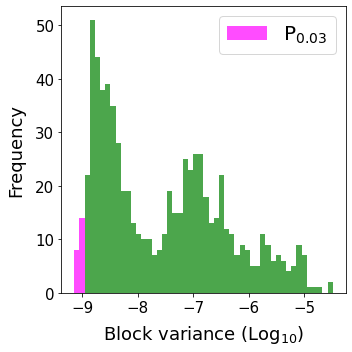

In [1]:
## --------------------------------------------------------------------- ## 
## ---- Plot local variances histogram and calculate 3rd percentile ---- ##
## --------------------------------------------------------------------- ## 

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define variances file directory
file = '*/vars.csv' # Change accordingly

# Read CSV containing block variances
df = pd.read_csv(file)

# Sort variances
sorted_variances = df['var'].copy()
sorted_variances.sort_values(inplace=True)
sorted_variances = np.log(sorted_variances)

# Calculate the 3rd percentile
quantile_03 = sorted_variances.quantile(0.03)

# Create a histogram with bars below or equal to the 3rd percentile in magenta, and the rest in green
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist([sorted_variances[sorted_variances <= quantile_03], sorted_variances[sorted_variances > quantile_03]],
         bins=50, color=['magenta', 'green'], alpha=0.7, stacked=True)

ax.set_xlabel(r'Block variance (Log$_{\rm 10})$', labelpad=8, fontsize=18)
ax.set_ylabel('Frequency', labelpad=10, fontsize=18)
legend_labels = [r'P$_{\rm 0.03}$']
ax.legend(legend_labels, loc='upper right', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

fig.tight_layout()

# Save plot
out_dir = '*' # Change accordingly
#plt.savefig(out_dir+'/histogram.png', dpi=300)
